<a href="https://colab.research.google.com/github/brian-ho/intro-to-urban-data/blob/main/Scale/S04_GeoPandas_Exercise_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **04 Scale**  GeoPandas Exercise - Answer Key

```
    Class       ARCH 6131 Urban Design Methods / Skills / Tools 1
                Tata Innovation Center
                Fall 2025
                Monday 9:30 AM to 12 PM

    Instructor  Brian Ho
                brian@brian-ho.io
```

This notebook serves as an exercise to practice some of the key technique using GeoPandas for GIS. It assumes you've completed the similar exerciss in the "Basic Python Data Structures" notebook. If you haven't — please complete that beforehand!

## Part 0 A Warm-Up
The following is meant to get you started and set up in this notebook. It also serves as a brief refresher on some key concepts. If you don't have the buildings data, please get it [here](https://github.com/brian-ho/intro-to-urban-data/blob/main/example_data/buildings.geojson).

In [1]:
# Connect to Google Drive
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Install some additional libraries
!pip install geoplot --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 32.6 MB/s eta 0:00:00


In [5]:
# Import your dependencies
import geopandas as gpd
import pandas as pd
import geoplot

In [1]:
# Don't forget to re-name the variable below!
BUILDINGS_FILE_PATH = "example_data/buildings.geojson"

# Load in the data
buildings_gdf = gpd.read_file(BUILDINGS_FILE_PATH)

NameError: name 'gpd' is not defined

## Part 1: The Basics
Complete the following using the `buildings_gdf` dataset. If you don't have the buildings data, please get it [here](https://github.com/brian-ho/intro-to-urban-data/blob/main/example_data/buildings.geojson).

1. How many buildings are in the `buildings_gdf` dataset?

In [35]:
print(f"There are {len(buildings_gdf)} buildings.")

There are 11868 buildings.



2. How many columns are there in the `buildings_gdf` dataset?

In [38]:
print(f"There are {buildings_gdf.shape[1]} columns.")

There are 8 columns.


3.  Print all the names of the columns in `buildings_gdf`.

In [40]:
for col in buildings_gdf.columns.tolist():
    print(col)

base_bbl
cnstrct_yr
doitt_id
groundelev
heightroof
mpluto_bbl
name
geometry


## Part 2: Summaries
4. Compute the  height of each building in `buildings_gdf`, adding it as a column to the dataframe.

In [44]:
# A secret trick quesiton!
# buildings_gdf['heightroof'] is the height column per the original dataset
# See https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md#2-data-quality-and-specifications

5. Find the height of the tallest building in `buildings_gdf`.

In [47]:
print(f'The tallest buildinngs is {buildings_gdf["heightroof"].max()} feet.')

The tallest buildinngs is 1408.377901 feet.


6. Find the height of the building with the lowest ground elevation in `buildings_gdf`.

In [51]:
lowest_ground_elevation = buildings_gdf["groundelev"].min()
height = buildings_gdf[buildings_gdf["groundelev"] == lowest_ground_elevation][
    "heightroof"
].values[0]

print(f"The height of the building with the lowest ground elevation is {height} feet.")

The height of the building with the lowest ground elevation is 132.46595151 feet.


7. Estimate the volume of each buliding as its height times its area. You'll need to conver your buildings to be in feet, not degrees. Add the volume as a column to the `buildings_gdf`.

<Axes: >

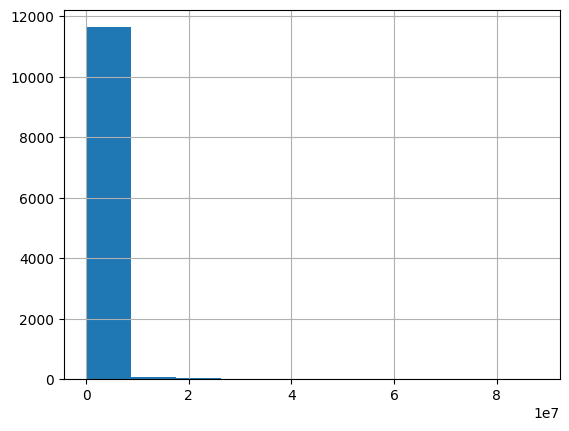

In [52]:
buildings_gdf_converted = buildings_gdf.to_crs(2263)
buildings_gdf_converted["area"] = buildings_gdf_converted["geometry"].area
buildings_gdf_converted["volume"] = (
    buildings_gdf_converted["area"] * buildings_gdf_converted["heightroof"]
)

buildings_gdf_converted["volume"].hist(bins=10)

8. Find the mean (average) and median volume of all buildings.

In [53]:
print(f'The mean volume is {buildings_gdf_converted["volume"].mean()}')
print(f'The median volume is {buildings_gdf_converted["volume"].median()}')

The mean volume is 567986.463149966
The median volume is 104363.10577937431


## Part 3: Operations
9. Extract the geometry for the borough of Manhattan from `nyc_boroughs_gdf`.

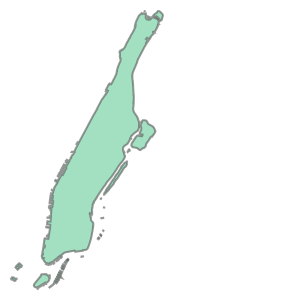

In [56]:
nyc_boroughs_gdf_converted = nyc_boroughs_gdf.to_crs(2263)

manhattan_geom = nyc_boroughs_gdf_converted[
    nyc_boroughs_gdf_converted["BoroName"] == "Manhattan"
]["geometry"].values[0]
manhattan_geom

10. Buffer the geometry in by 100 feet — so that it is smaller. What is its area?

In [69]:
buffered_manhattan_geom = manhattan_geom.buffer(-100)
print(f"Buffered-in area is {buffered_manhattan_geom.area}")

Buffered-in area is 607256989.2386044


11. Using the buffered (smaller) geometry for Manhattan, create a GeoDataFrame with a single row.

In [72]:
buffered_manhattan_gdf = gpd.GeoDataFrame(geometry=[buffered_manhattan_geom], crs=2263)

12. Create a spatial join to extract all the buildings in `buildings_gdf` that are in your buffered (smaller) geometry for Manhattan.

<Axes: >

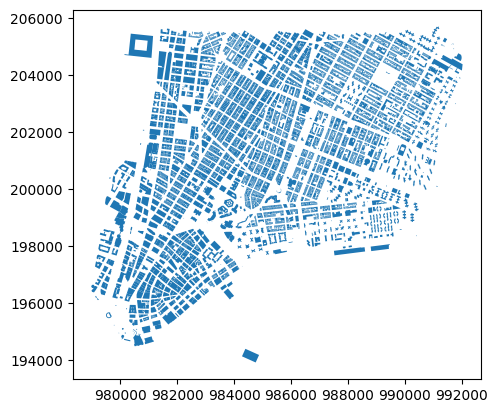

In [83]:
buildings_in_manhattan = buildings_gdf_converted.sjoin(buffered_manhattan_gdf)

buildings_in_manhattan.plot()

13. Plot the histogram for the height of all the buildings in your buffered (smaller) geometry for Manhattan.

<Axes: >

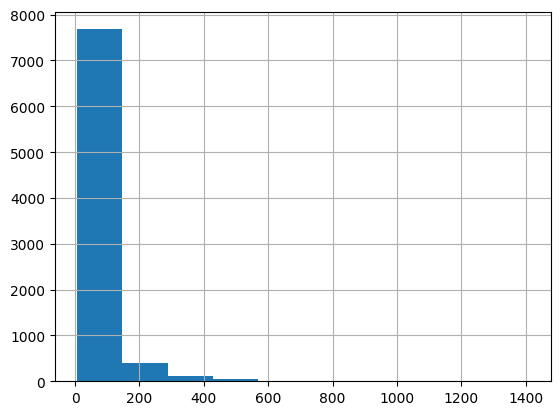

In [79]:
buildings_in_manhattan["heightroof"].hist()

14. Plot a scatterplot with the ground elevation as the X-axis and the total height as the Y-axis.

<Axes: xlabel='groundelev', ylabel='heightroof'>

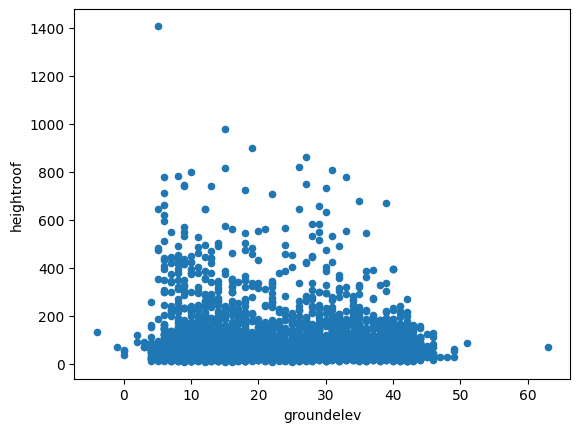

In [82]:
buildings_in_manhattan.plot.scatter("groundelev", "heightroof")

That's it! Save the resulting GeoJSON to your Google Drive to submit later.

## Optional Challenge!
If you'd like to preview some of next week's material, try using `apply` functions. Can you write and apply a function that takes a building and checks if:
- Its ground elevation is higher than 10 feet
- Its total height is more than 50 feet
- Its footprint area is larger than 1,000 square feet
- It is _not_ contained in Manhattan

In [89]:
def my_apply_function(building_row):
    if (
        building_row["groundelev"] > 10
        and building_row["heightroof"] > 50
        and building_row["geometry"].area > 1e3
        and not building_row["geometry"].intersects(manhattan_geom)
    ):
        return True
    else:
        return False

Now that you have that function, apply it to the `buildings_gdf` dataframe. Can you filter the results to just those that match?

<Axes: >

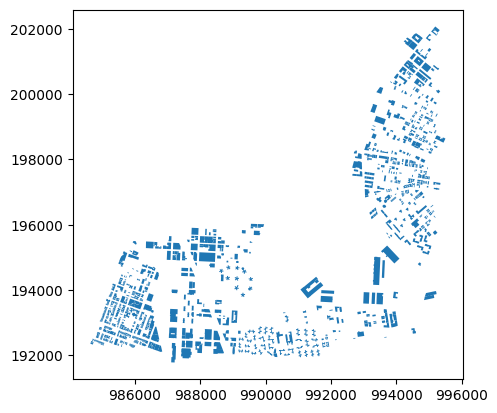

In [90]:
msk = buildings_gdf_converted.apply(my_apply_function, axis=1)
final_gdf = buildings_gdf_converted[msk]
final_gdf.plot()

If you made it this far, save a separate GeoJSON to your Google Drive to submit later!

In [92]:
final_gdf.to_crs(4326).to_file("results.geojson", driiver="GeoJSON")